In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from tqdm import tqdm
from keras import callbacks
from keras.callbacks import EarlyStopping
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from statistics import mean
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree

In [6]:
train_data=pd.read_csv('database/train.csv')
test_data =pd.read_csv('database/test.csv')
val_data=pd.read_csv('database/val.csv')

In [7]:
train_data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow


In [8]:
dict_train=train_data['Label'].value_counts()

In [9]:
dict_train

Label
PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: count, dtype: int64

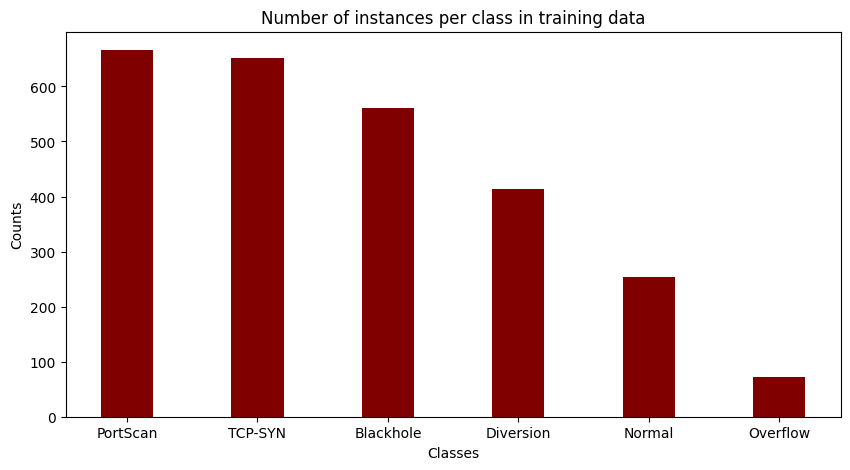

In [10]:
keys_tr = dict_train.keys()
values_tr =dict_train.values 
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(keys_tr, values_tr, color ='maroon',width = 0.4) 
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title('Number of instances per class in training data')
plt.show()

In [11]:
dict_val=val_data['Label'].value_counts()

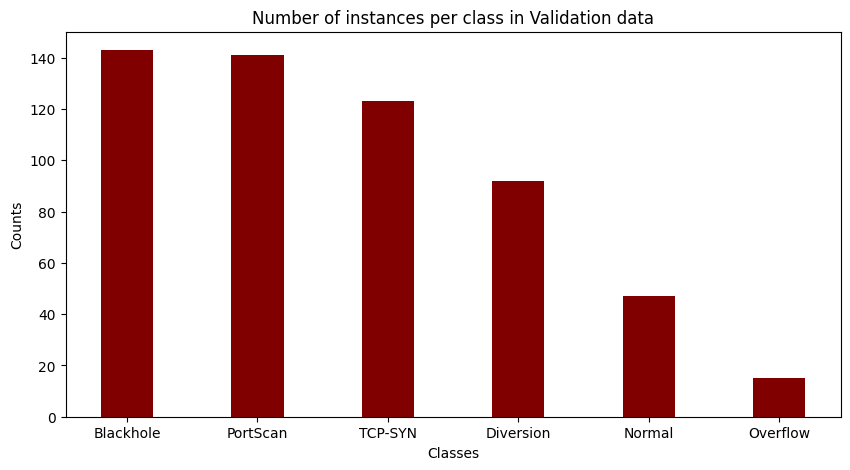

In [12]:
keys_val = dict_val.keys()
values_val =dict_val.values  
fig = plt.figure(figsize = (10, 5)) 

plt.bar(keys_val, values_val, color ='maroon',width = 0.4) 
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title('Number of instances per class in Validation data')
plt.show()

In [13]:
dict_test=test_data['Label'].value_counts()

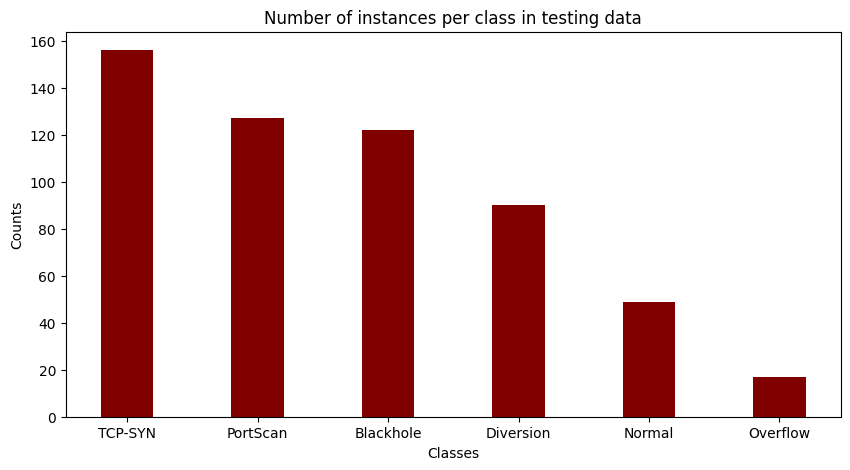

In [14]:
keys_tes = dict_test.keys()
values_tes =dict_test.values  
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(keys_tes, values_tes, color ='maroon',width = 0.4) 
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title('Number of instances per class in testing data')
plt.show()

In [15]:
train_data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

In [16]:
test_data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

In [17]:
val_data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      2619 non-null   object
 1   Port Number                    2619 non-null   object
 2   Received Packets               2619 non-null   int64 
 3   Received Bytes                 2619 non-null   int64 
 4   Sent Bytes                     2619 non-null   int64 
 5   Sent Packets                   2619 non-null   int64 
 6   Port alive Duration (S)        2619 non-null   int64 
 7   Delta Received Packets         2619 non-null   int64 
 8   Delta Received Bytes           2619 non-null   int64 
 9   Delta Sent Bytes               2619 non-null   int64 
 10  Delta Sent Packets             2619 non-null   int64 
 11  Delta Port alive Duration (S)  2619 non-null   int64 
 12  Connection Point               2619 non-null   int64 
 13  Tot

In [24]:
data = train_data.drop(columns = ["Label", "Switch ID", "Port Number"])
Q1_train=data.quantile(0.25)
Q3_train=data.quantile(0.75)
IQR_train= Q3_train -Q1_train 
((data < Q1_train -1.5*IQR_train) | (data > Q3_train +1.5*IQR_train)).sum()

Received Packets                 312
Received Bytes                   186
Sent Bytes                       222
Sent Packets                     379
Port alive Duration (S)            0
Delta Received Packets           649
Delta Received Bytes             648
Delta Sent Bytes                 604
Delta Sent Packets               604
Delta Port alive Duration (S)    441
Connection Point                   0
Total Load/Rate                  396
Total Load/Latest                501
Unknown Load/Rate                396
Unknown Load/Latest              501
Latest bytes counter             396
Active Flow Entries              152
Packets Looked Up                536
Packets Matched                  536
dtype: int64

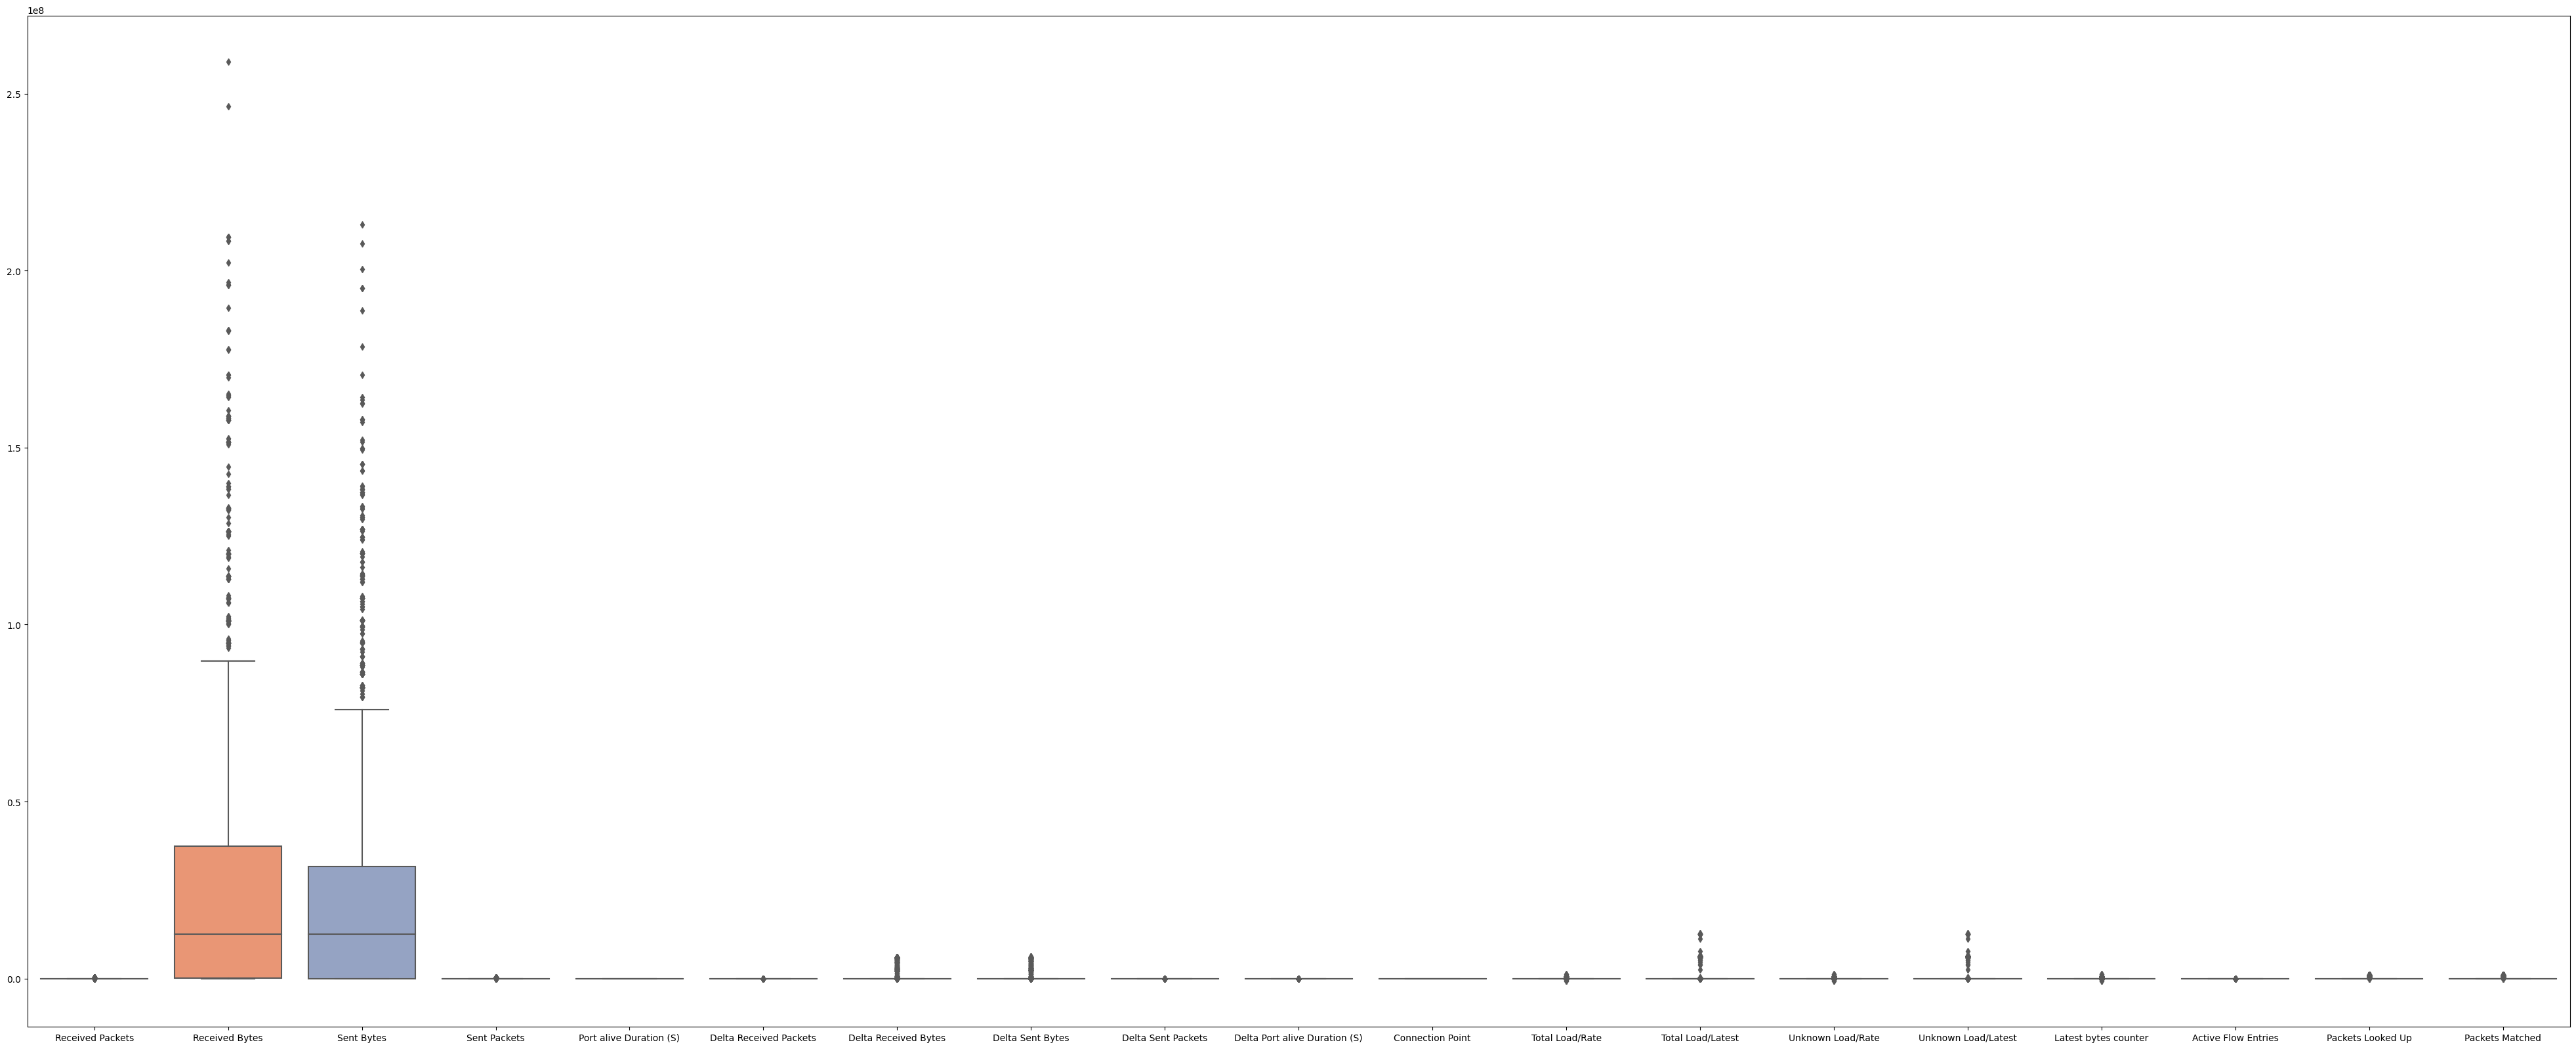

In [19]:
plt.figure(figsize=(50,20))
ax = sns.boxplot(data=train_data, palette="Set2")

In [29]:
data = test_data.drop(columns = ["Label", "Switch ID", "Port Number"])
Q1_test=data.quantile(0.25)
Q3_test=data.quantile(0.75)
IQR_test= Q3_test -Q1_test 
((data < Q1_test -1.5*IQR_test) | (data > Q3_test +1.5*IQR_test)).sum()

Received Packets                  69
Received Bytes                    38
Sent Bytes                        54
Sent Packets                      78
Port alive Duration (S)            0
Delta Received Packets           130
Delta Received Bytes             124
Delta Sent Bytes                 127
Delta Sent Packets               127
Delta Port alive Duration (S)     89
Connection Point                   0
Total Load/Rate                   76
Total Load/Latest                 99
Unknown Load/Rate                 76
Unknown Load/Latest               99
Latest bytes counter              76
Active Flow Entries               31
Packets Looked Up                108
Packets Matched                  108
dtype: int64

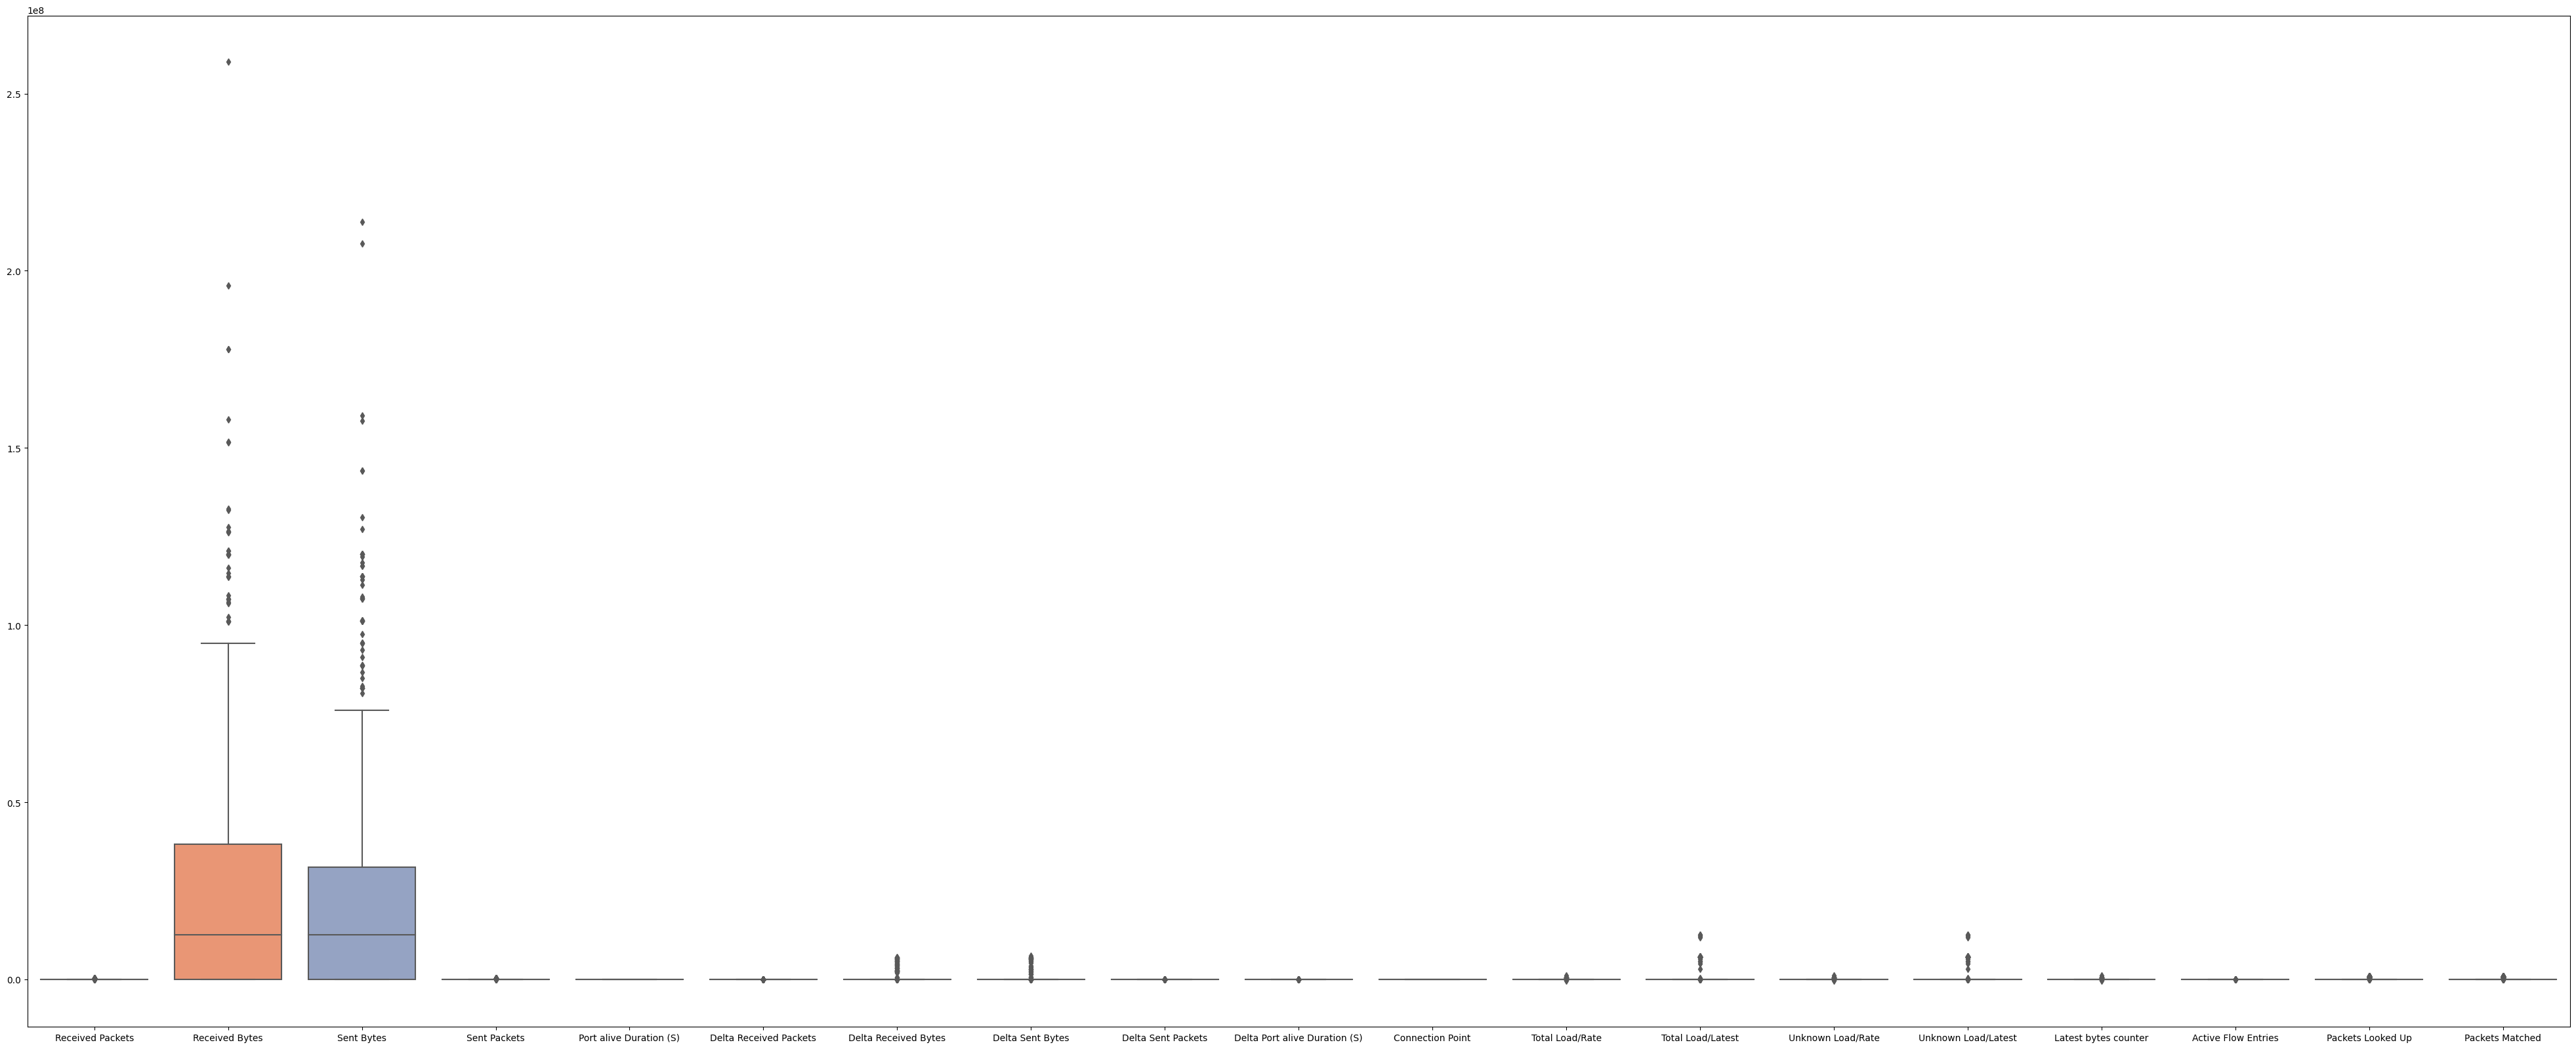

In [30]:
plt.figure(figsize=(50,20))
ax = sns.boxplot(data=test_data, palette="Set2")

In [32]:
data_val = val_data.drop(columns = ["Label", "Switch ID", "Port Number"])
Q1_val=data.quantile(0.25)
Q3_val=data.quantile(0.75)
IQR_val= Q3_val -Q1_val 
((data_val < Q1_val -1.5*IQR_val) | (data_val > Q3_val +1.5*IQR_val)).sum()

Received Packets                  74
Received Bytes                    32
Sent Bytes                        54
Sent Packets                      75
Port alive Duration (S)            0
Delta Received Packets           112
Delta Received Bytes             105
Delta Sent Bytes                 119
Delta Sent Packets               120
Delta Port alive Duration (S)     86
Connection Point                   0
Total Load/Rate                   60
Total Load/Latest                 90
Unknown Load/Rate                 60
Unknown Load/Latest               90
Latest bytes counter              60
Active Flow Entries               30
Packets Looked Up                118
Packets Matched                  119
dtype: int64

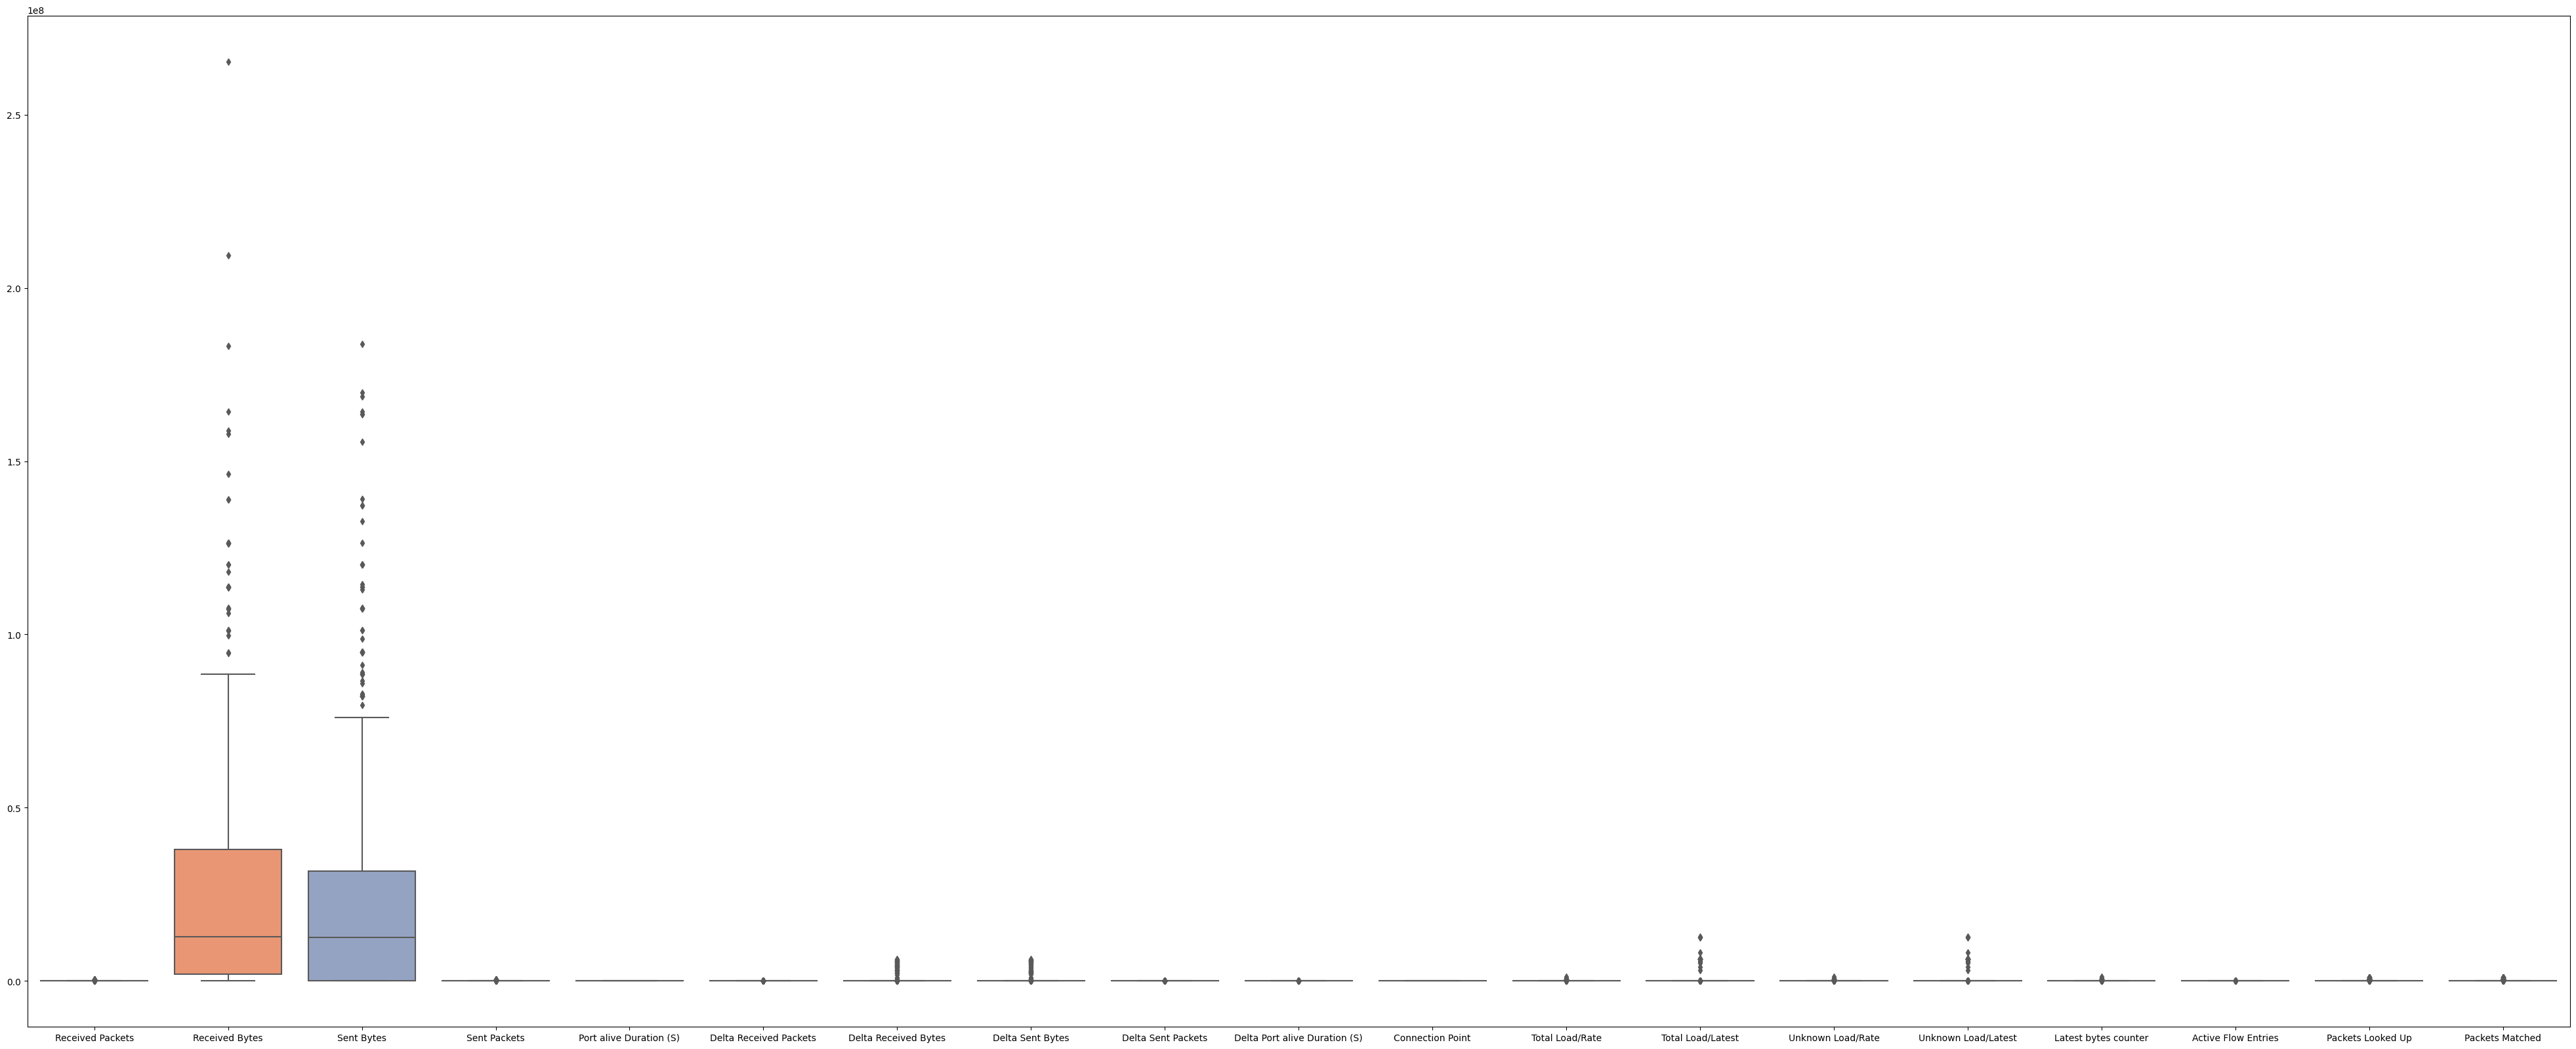

In [33]:
plt.figure(figsize=(50,20))
ax = sns.boxplot(data=val_data, palette="Set2")

In [34]:
test_data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.00000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,5.610000e+02,5.610000e+02
mean,23141.636364,2.726677e+07,2.438093e+07,30155.998217,910.654189,149.048128,4.546660e+05,3.171120e+05,169.782531,4.841355,2.44385,1.992058e+04,6.084924e+05,1.992058e+04,6.084924e+05,1.992058e+04,61.912656,9.053312e+04,9.041352e+04
std,69278.589077,3.627827e+07,3.439084e+07,82370.302150,981.303212,861.268543,1.381151e+06,1.207563e+06,1030.484551,0.365671,1.20006,1.105112e+05,1.985467e+06,1.105112e+05,1.985467e+06,1.105112e+05,601.548185,2.235338e+05,2.235324e+05
min,10.000000,8.560000e+02,6.854000e+03,49.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.00000,-4.042080e+05,0.000000e+00,-4.042080e+05,0.000000e+00,-4.042080e+05,4.000000,1.790000e+02,9.800000e+01
25%,353.000000,1.042010e+05,4.480100e+04,322.000000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.346000e+03,2.238000e+03
50%,1376.000000,1.267023e+07,1.262299e+07,1215.000000,256.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,7.066000e+03,6.929000e+03
75%,3562.000000,3.809469e+07,3.176783e+07,4054.000000,1742.000000,19.000000,1.823000e+03,7.590000e+02,5.000000,5.000000,3.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,1.963300e+04,1.940900e+04
max,352572.000000,2.589394e+08,2.138743e+08,420932.000000,3307.000000,11130.000000,6.323770e+06,6.647966e+06,13840.000000,5.000000,5.00000,1.194922e+06,1.264637e+07,1.194922e+06,1.264637e+07,1.194922e+06,9980.000000,1.009529e+06,1.009394e+06


In [35]:
train_data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2619.000000,2.619000e+03,2.619000e+03
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,2.450935,2.044276e+04,5.033087e+05,2.044276e+04,5.033087e+05,2.044276e+04,94.972890,9.920463e+04,9.908445e+04
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,1.159286,1.141013e+05,1.796231e+06,1.141013e+05,1.796231e+06,1.141013e+05,828.181086,2.363175e+05,2.363162e+05
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,-6.446240e+05,0.000000e+00,-6.446240e+05,0.000000e+00,-6.446240e+05,4.000000,1.050000e+02,5.000000e+01
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.263000e+03,2.147000e+03
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,6.968000e+03,6.843000e+03
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.163300e+04,2.140800e+04
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,5.000000,1.260657e+06,1.275386e+07,1.260657e+06,1.275386e+07,1.260657e+06,9985.000000,1.012220e+06,1.012085e+06


In [36]:
val_data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,5.610000e+02,5.610000e+02
mean,20265.901961,2.651052e+07,2.462073e+07,26309.124777,949.360071,238.839572,3.268137e+05,2.927781e+05,162.711230,4.846702,2.422460,1.349392e+04,4.418708e+05,1.349392e+04,4.418708e+05,1.349392e+04,62.071301,8.382923e+04,8.370799e+04
std,59032.911054,3.505715e+07,3.420225e+07,75202.041514,977.609275,1149.069110,1.181636e+06,1.106077e+06,909.905479,0.360596,1.150215,9.124726e+04,1.725488e+06,9.124726e+04,1.725488e+06,9.124726e+04,601.962008,2.056357e+05,2.056371e+05
min,10.000000,8.560000e+02,7.202000e+03,50.000000,36.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,1.400000e+02,8.400000e+01
25%,379.000000,1.962210e+06,4.856800e+04,377.000000,141.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.462000e+03,2.350000e+03
50%,1385.000000,1.266395e+07,1.263028e+07,1239.000000,317.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,8.105000e+03,7.979000e+03
75%,3642.000000,3.785762e+07,3.176313e+07,3889.000000,1750.000000,5.000000,6.260000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.073500e+04,2.060700e+04
max,350280.000000,2.652568e+08,1.837435e+08,419567.000000,3287.000000,11273.000000,6.249706e+06,6.302708e+06,11273.000000,5.000000,5.000000,1.260664e+06,1.273210e+07,1.260664e+06,1.273210e+07,1.260664e+06,9979.000000,1.009010e+06,1.008875e+06


In [37]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]
X_val=val_data.iloc[:,:-1]
y_val=val_data.iloc[:,-1]
X_tes=test_data.iloc[:,:-1]
y_tes=test_data.iloc[:,-1]

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_tes= pd.DataFrame(le.fit_transform(y_tes))
y_train= pd.DataFrame(le.fit_transform(y_train))
y_val= pd.DataFrame(le.fit_transform(y_val))
X_train['Port Number']=le.fit_transform(X_train['Port Number'])
X_val['Port Number']=le.fit_transform(X_val['Port Number'])
X_tes['Port Number']=le.fit_transform(X_tes['Port Number'])
X_train['Switch ID']=le.fit_transform(X_train['Switch ID'])
X_val['Switch ID']=le.fit_transform(X_val['Switch ID'])
X_tes['Switch ID']=le.fit_transform(X_tes['Switch ID'])
y_trainle= pd.DataFrame(y_train)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#Train
XX_train=sc.fit_transform(X_train)
#Test
XX_val=sc.fit_transform(X_val)
#Val
XX_tes=sc.fit_transform(X_tes)

In [47]:
mlp = keras.models.Sequential()
mlp.add(Dense(64, activation='relu', input_shape=(21,)))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(6, activation='softmax',))
mlp.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer=Adam(learning_rate= 0.001, weight_decay= 0.001), metrics=['accuracy'])

In [48]:
h = mlp.fit(XX_train, y_train,validation_data= (XX_tes,y_tes), epochs=100, batch_size=1, verbose=1)

Epoch 1/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.8517 - accuracy: 0.6346 - val_loss: 0.6647 - val_accuracy: 0.7326
Epoch 2/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.6733 - accuracy: 0.7068 - val_loss: 0.6120 - val_accuracy: 0.7380
Epoch 3/100
2619/2619 [==============================] - 4s 2ms/step - loss: 0.6292 - accuracy: 0.7297 - val_loss: 0.5923 - val_accuracy: 0.7576
Epoch 4/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.5993 - accuracy: 0.7457 - val_loss: 0.5959 - val_accuracy: 0.7594
Epoch 5/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.5856 - accuracy: 0.7549 - val_loss: 0.6270 - val_accuracy: 0.6898
Epoch 6/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.5631 - accuracy: 0.7556 - val_loss: 0.5489 - val_accuracy: 0.7932
Epoch 7/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.5467 - accuracy: 0.7763 - val_loss: 0.5469 - val_ac

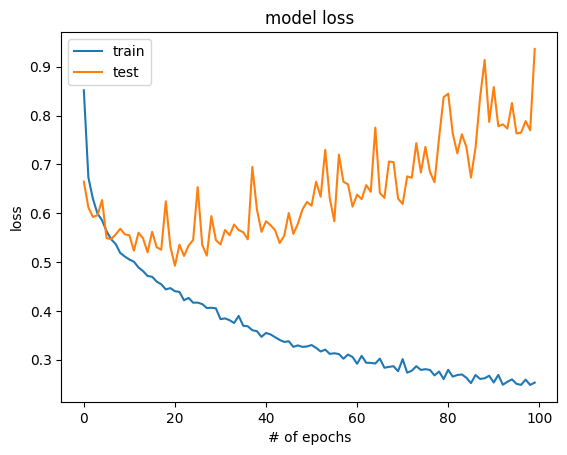

In [49]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
mlp2 = keras.models.Sequential()
mlp2.add(Dense(64, activation='relu', input_shape=(21,)))
mlp2.add(Dense(32, activation='relu'))
mlp2.add(Dense(6, activation='softmax',))
mlp2.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer=Adam(learning_rate= 0.001, weight_decay= 0.001), metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor='accuracy', verbose=1, mode='max', restore_best_weights=True)
h2 = mlp2.fit(XX_train, y_train,validation_data= (XX_tes,y_tes), epochs=100, batch_size=1, verbose=1, callbacks=[earlystopping])

Epoch 1/100
2619/2619 [==============================] - 4s 1ms/step - loss: 0.8552 - accuracy: 0.6331 - val_loss: 0.6929 - val_accuracy: 0.7308
Epoch 2/100
2619/2619 [==============================] - 4s 1ms/step - loss: 0.6684 - accuracy: 0.7178 - val_loss: 0.6463 - val_accuracy: 0.7433
Epoch 3/100
2619/2619 [==============================] - 4s 1ms/step - loss: 0.6376 - accuracy: 0.7297 - val_loss: 0.6158 - val_accuracy: 0.7504
Epoch 4/100
2619/2619 [==============================] - 5s 2ms/step - loss: 0.6096 - accuracy: 0.7488 - val_loss: 0.6315 - val_accuracy: 0.7005
Epoch 5/100
2619/2619 [==============================] - 4s 1ms/step - loss: 0.5892 - accuracy: 0.7629 - val_loss: 0.6491 - val_accuracy: 0.6863
Epoch 6/100
2619/2619 [==============================] - 4s 2ms/step - loss: 0.5730 - accuracy: 0.7617 - val_loss: 0.6235 - val_accuracy: 0.7291
Epoch 6: early stopping


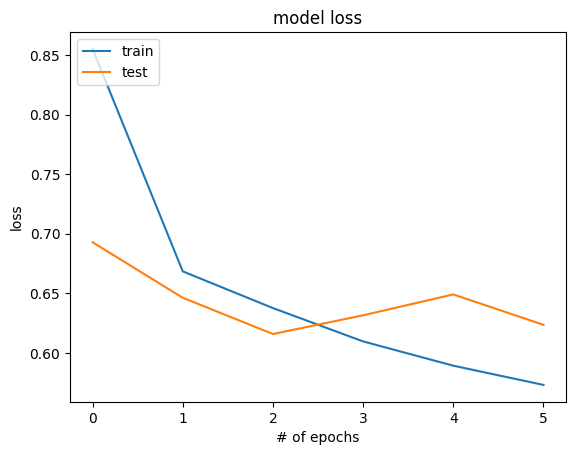

In [66]:
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
h_train=100*mlp.evaluate(XX_val,y_val, verbose=1)[1]

18/18 [==============================] - 0s 2ms/step - loss: 1.3433 - accuracy: 0.7754


In [52]:
print(f'Test accuracy: {h_train}')

Test accuracy: 77.54010558128357


In [68]:
print(f'Test accuracy: {100*mlp2.evaluate(XX_val,y_val, verbose=0)[1]}')

Test accuracy: 69.69696879386902


18/18 [==============================] - 0s 1ms/step


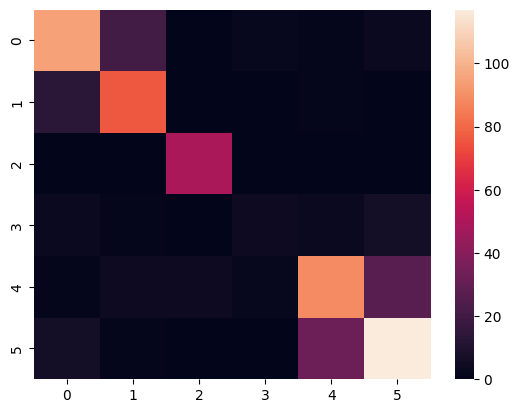

In [63]:
label_pred=mlp.predict(XX_tes) 
final_label = np.argmax(label_pred, axis=1)
final_label = final_label.reshape((-1,1))
cnf_matrix=confusion_matrix(y_tes,final_label)
sns.heatmap( cnf_matrix )
plt.show()

18/18 [==============================] - 0s 1ms/step


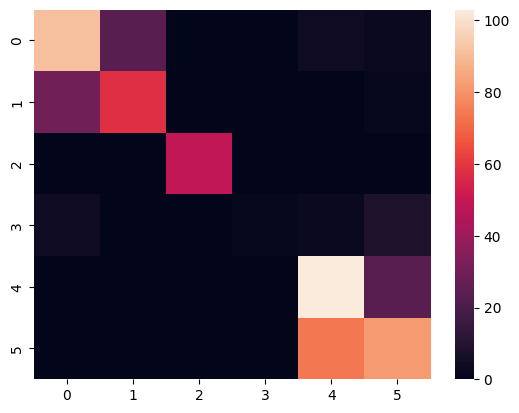

In [67]:
label_pred=mlp2.predict(XX_tes) 
final_label = np.argmax(label_pred, axis=1)
final_label = final_label.reshape((-1,1))
cnf_matrix=confusion_matrix(y_tes,final_label)
sns.heatmap( cnf_matrix )
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.50      0.60       143
           1       0.61      0.85      0.71        92
           2       1.00      1.00      1.00        47
           3       0.07      0.40      0.12        15
           4       0.99      0.55      0.71       141
           5       0.68      0.69      0.69       123

    accuracy                           0.65       561
   macro avg       0.68      0.66      0.64       561
weighted avg       0.78      0.65      0.68       561



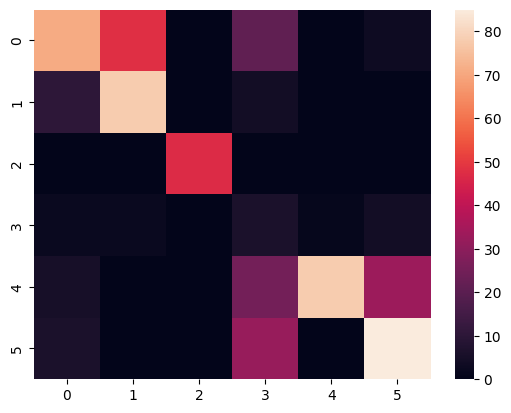

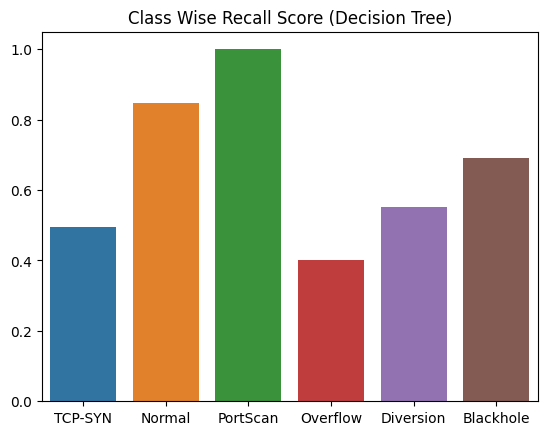

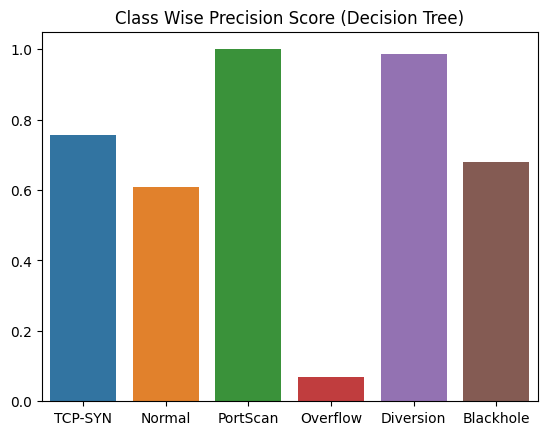

In [60]:
DTC_Classifier = tree.DecisionTreeClassifier()
DTC_Classifier.fit(XX_train, y_train)

y_pred = DTC_Classifier.predict( XX_val )

print( classification_report( y_val , y_pred ) )

matrix = confusion_matrix( y_val , y_pred )
sns.heatmap( matrix )
plt.show()

target_class = train_data['Label'].unique()
target_class
sns.barplot( x = target_class ,y = recall_score( y_val , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (Decision Tree)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_val , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (Decision Tree)")
plt.show()

C:\Users\gdiva\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.78      0.66      0.72       122
           1       0.68      0.67      0.67        90
           2       0.98      1.00      0.99        49
           3       1.00      0.06      0.11        17
           4       0.80      0.54      0.65       127
           5       0.62      0.92      0.74       156

    accuracy                           0.72       561
   macro avg       0.81      0.64      0.65       561
weighted avg       0.75      0.72      0.71       561



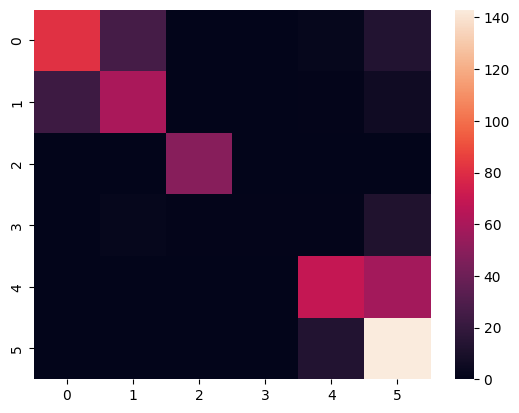

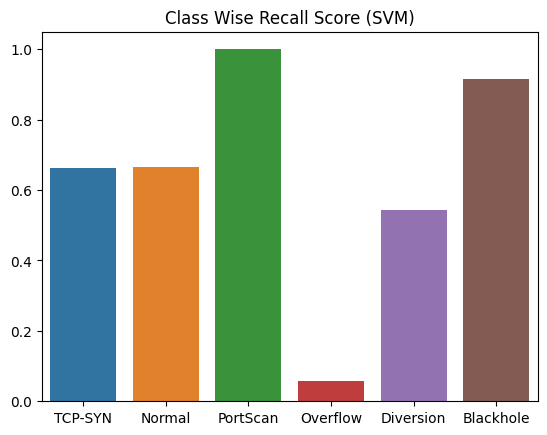

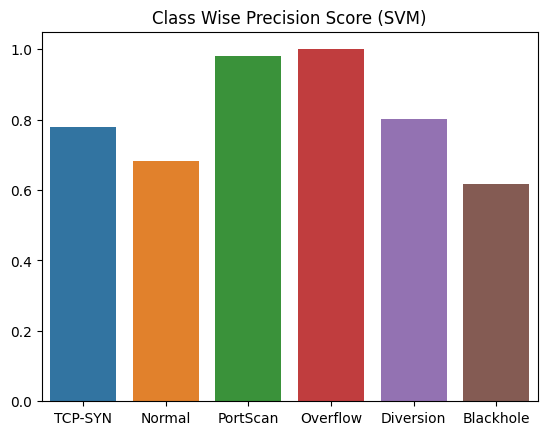

In [62]:
clf = SVC()
clf.fit( XX_train , y_train )

y_pred = clf.predict( XX_tes )

print( classification_report( y_tes , y_pred ) )

matrix = confusion_matrix( y_tes , y_pred )
sns.heatmap( matrix )
plt.show()

sns.barplot( x = target_class ,y = recall_score( y_tes , y_pred , average =  None) )
plt.title( "Class Wise Recall Score (SVM)")
plt.show()

sns.barplot( x = target_class ,y = precision_score( y_tes , y_pred , average =  None) )
plt.title( "Class Wise Precision Score (SVM)")
plt.show()